In [1]:
import pandas as pd
import numpy as np
import gensim
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import DBSCAN
import random

In [2]:
#import data
df = pd.read_csv("./fact_challenge-2.csv")

In [8]:
pd.DataFrame(df.head(1000000)).to_csv("./fact_challenge_1000000.csv")

In [9]:
df_1000000 = pd.read_csv("./fact_challenge_1000000.csv")

In [10]:
print(df_1000000.shape)

(1000000, 8)


In [9]:
#num of users in our train data
k = 100000 
#number of columns in train data
num_colors = df['color_id'].max()
#initialize empty training data
data = np.zeros((k,num_colors+2))
#initialise first coloumn of training data to users id
data[:,0]= df['user_id'].unique()[:k]

In [10]:
#get assign_color events
df_assign = df[df['event'] == 'assign_color']
#get user_id and color_id coloumns
df_assign= df_assign[['user_id' , 'color_id']]

In [11]:
#create training data: each row is a user, and coloumn are colors id.
#element in data[i,j] is the rate of selection for color j for user i.  
def create_most_common_matrix(df,data):
    for i,user in enumerate(data[:,0]): 
        userData = df[df['user_id'] == user]['color_id']
        m = len(userData)
        userData = userData.values
        colors, counts = np.unique(userData,return_counts = True)
        #diver = len(colors) / m
        #data[i,-1] = diver
        for j,color in enumerate(colors):
            data[i,color-1] = counts[j]/m
        if (i%1000 == 0):
            print(i)
    return data
            

In [12]:
data =  create_most_common_matrix(df_assign,data) 

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


In [ ]:
#dimension reduction using pca
data_reduction = PCA(n_components = 100).fit_transform(data[:,1:])

In [23]:
color_data = np.zeros((num_colors+1))
for color_id in df['color_id']:
    if color_id != 0:
        data[color_id] += 1

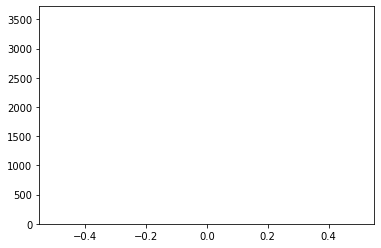

0.0
[0. 0. 0. ... 0. 0. 0.]


In [26]:
plt.hist(color_data,bins = num_colors+1)
plt.show()
print(color_data.max())
print(color_data)

In [8]:

kmeans_pca_100d = KMeans(n_clusters=12).fit_predict(data)

[2 2 2 ... 3 7 7]


(array([3107., 1254., 6296., 1102., 1236., 3463., 1180., 4859., 1713.,
        3197., 1276., 1317.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

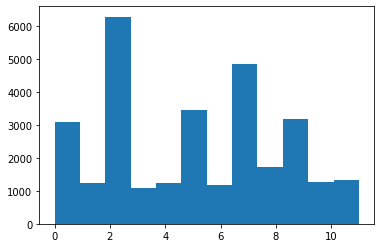

In [9]:
print(kmeans_pca_100d)
plt.hist(kmeans_pca_100d,bins = 12)
plt.show()

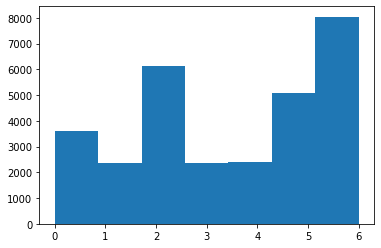

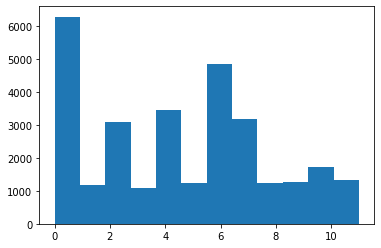

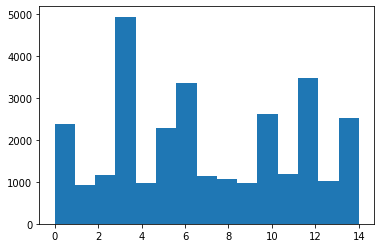

KeyboardInterrupt: 

In [185]:
num_of_clusters = [7,12,15,18,10,25,30,40]
for cluster in num_of_clusters:
    plt.hist(KMeans(n_clusters=cluster).fit_predict(data),bins = cluster)
    plt.show()    

In [14]:
#dimension reduction to 2-dimensional data using TSNE for data visualization
data_embedded = TSNE(n_components=2).fit_transform(data[:,1:-1])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


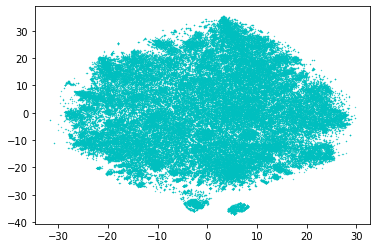

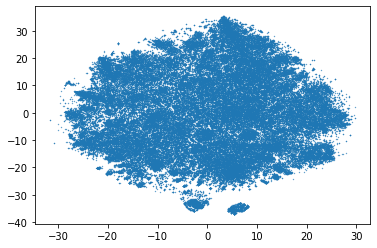

In [22]:
#visualize the TSNE data
kmeans = KMeans(n_clusters=10).fit(data[:,1:-1])
clusters = kmeans.predict(data[:,1:-1])
#for i in range(10):
    
filtered_label0 = data_embedded[clusters == 0]
filtered_label1 = data_embedded[clusters == 1]
filtered_label2 = data_embedded[clusters == 2]
filtered_label3 = data_embedded[clusters == 3]
filtered_label4 = data_embedded[clusters == 4]
filtered_label5 = data_embedded[clusters == 5]
filtered_label6 = data_embedded[clusters == 6]
filtered_label7 = data_embedded[clusters == 7]
filtered_label8 = data_embedded[clusters == 8]
filtered_label9 = data_embedded[clusters == 9]

plt.scatter(filtered_label0[:,0],filtered_label0[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label1[:,0],filtered_label1[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label2[:,0],filtered_label2[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label3[:,0],filtered_label3[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label4[:,0],filtered_label4[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label5[:,0],filtered_label5[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label6[:,0],filtered_label6[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label7[:,0],filtered_label7[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label8[:,0],filtered_label8[:,1], s= 0.1, color = 'c' )
plt.scatter(filtered_label9[:,0],filtered_label9[:,1], s= 0.1, color = 'c' )
plt.show()
plt.scatter(data_embedded[:,0], data_embedded[:,1], s=0.1 )
plt.show()


In [240]:
from sklearn.cluster import AffinityPropagation
AP = AffinityPropagation(damping=0.9)
AP.fit(data[:,1:-1])
clusters = AP.predict(data[:,1:-1])
clusters = kmeans.predict(data[:,1:-1])
filtered_label0 = data_embedded[clusters == 0]
filtered_label1 = data_embedded[clusters == 1]
filtered_label2 = data_embedded[clusters == 2]
filtered_label3 = data_embedded[clusters == 3]
filtered_label4 = data_embedded[clusters == 4]
filtered_label5 = data_embedded[clusters == 5]
filtered_label6 = data_embedded[clusters == 6]
filtered_label7 = data_embedded[clusters == 7]

plt.scatter(filtered_label0[:,0],filtered_label0[:,1], s= 0.1, color = 'red' )
plt.scatter(filtered_label1[:,0],filtered_label1[:,1], s= 0.1, color = 'blue' )
plt.scatter(filtered_label2[:,0],filtered_label2[:,1], s= 0.1, color = 'green' )
plt.scatter(filtered_label3[:,0],filtered_label3[:,1], s= 0.1, color = 'yellow' )
plt.scatter(filtered_label4[:,0],filtered_label4[:,1], s= 0.1, color = 'pink' )
plt.scatter(filtered_label5[:,0],filtered_label5[:,1], s= 0.1, color = 'orange' )
plt.scatter(filtered_label6[:,0],filtered_label6[:,1], s= 0.1, color = 'black' )

plt.show()

KeyboardInterrupt: 

In [186]:
num_of_clusters = 7
clusters = KMeans(n_clusters=num_of_clusters).fit_predict(data[:,1:-1])

In [187]:
challenge_finished = pd.read_csv("./challenges_finished.csv")
prof_snap = pd.read_csv("./profile_snapshot.csv")

In [188]:
#calc score for the given user_id using the df data.
def calc_score(df, user_id, n):
    # df - challenges_finished
    # n is the minimum number of challenges the user need to publish to maybe be the leader
    df_based_on_user = df[df['user_id'] == user_id]
    number_of_games = df_based_on_user.shape[0]
    if number_of_games < n:
        return 0;
    val_cnt = df_based_on_user['peer_position'].value_counts()
    ones = 0
    twos = 0
    threes = 0
    if 1 in val_cnt.index.tolist():
        ones = val_cnt.at[1]
    if 2 in val_cnt.index.tolist():
        twos = val_cnt.at[2]
    if 3 in val_cnt.index.tolist():
        threes = val_cnt.at[3]
    avg_rating = df['rating'].mean()
    return avg_rating * (ones * 2 + twos * 1.5 + threes) / number_of_games

def calc_popularity(df, user_id):
    # df = profile_snapshot
    df_based_on_user = df[df['user_id'] == user_id]
    if df_based_on_user['total_challenges_publish_last_30_days'].item() < 50:
        return 0
    if df_based_on_user['total_voting_vote_lt'].item() < 100:
        return 0
    return 1

In [190]:
user_table_with_score = np.zeros((k,3))
user_table_with_score[:,0] = data[:,0]
user_table_with_score[:,1] = clusters
for i, user_id in enumerate(user_table_with_score[:,0]):
    res = calc_score(challenge_finished, user_id ,50) * calc_popularity(prof_snap, user_id)
    user_table_with_score[i,2] = res
print(user_table_with_score)

[[2.69000e+03 1.00000e+00 0.00000e+00]
 [2.73500e+03 0.00000e+00 0.00000e+00]
 [2.73600e+03 0.00000e+00 0.00000e+00]
 ...
 [5.83871e+05 0.00000e+00 0.00000e+00]
 [6.51570e+04 0.00000e+00 0.00000e+00]
 [6.51820e+04 1.00000e+00 0.00000e+00]]


In [191]:
num_of_leaders = 50
leaders_table = np.zeros((num_of_leaders, num_of_clusters))
for i in range(num_of_clusters):
    temp_data = user_table_with_score[user_table_with_score[:,1] == i]
    sortedarr = temp_data[temp_data[:,2].argsort()]
    leaders_table[:,i] = sortedarr[-50:,0]

In [192]:
def find_leader(user_id, user_table_with_score, leaders_table, data):
    cluster_number = user_table_with_score[user_table_with_score[:,0] == user_id][:,1]
    leader_list = leaders_table[leaders_table[:,1] == cluster_number[0]]
    point1 = data[data[:,0] == user_id]
    point1 = point1[:,1:]
    dist = np.zeros(leaders_table.shape[0])
    for i, user in enumerate(leaders_table[:,0]):
        point2 = data[data[:,0] == user]
        point2 = point2[:,1:]
        dist[i] = np.linalg.norm(point1 - point2)
    sortedarr = dist.argsort()
    list_to_return = [leaders_table[i,0] for i in sortedarr[:5]]
    return list_to_return

In [193]:
user = data[0]
user_leader = find_leader(user[0],user_table_with_score, leaders_table, data)
print(user_leader)

[176556.0, 121122.0, 149764.0, 137470.0, 151503.0]


In [235]:
leader_id1 = leaders_table[:,0][-1]
a = data[data[:,0] == leader_id1 ][0]
leader_id = leaders_table[:,0][46]
b = data[data[:,0] == leader_id][0]
r = 0
w = 0
q = 0
for i in range(len(a)):
    if a[i]!=0:
        r+=1
    if (a[i]!= 0) and (b[i]!=0):
        w+=1
    if b[i]!=0:
        q+=1
print(r)
print(w)
print(q)

212
61
250
